In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 1. feladat

Fejtsd az alábbi periodikus jelet Fourier-sorba, és a definíció felhasználásával vezesd le az együtthatókat, és ábrázold azokat!

Hasonlítsd össze az eredeti jelet és a sorfejtésből egyre több tagot felhasználó visszaállított jelet. Vizsgáld meg, hogyan változik a visszaállított és az eredeti jel különbsége!

$$f(x)=\left\{\begin{array}{ll}1 & x\in[-1;0]\\1/2 & x=0\\x & x\in[0;1].\end{array}\right.$$


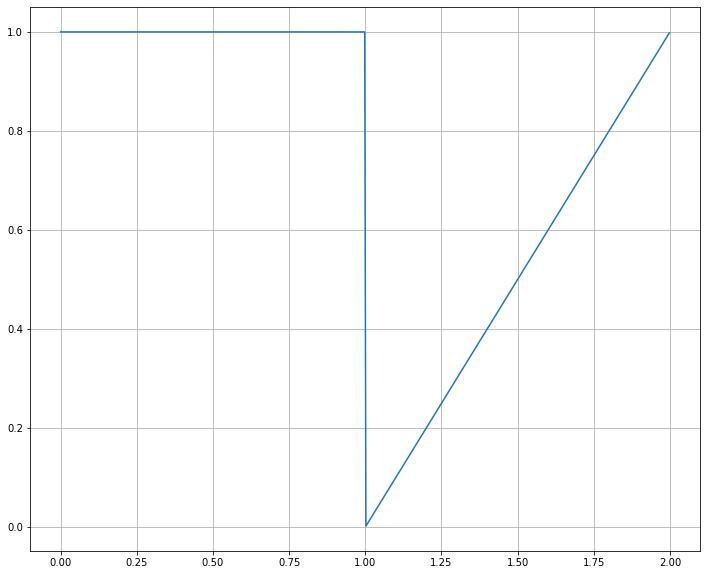

In [2]:
def firstfunction(t):
    
    sampling_rate = round(t*500) 
    time = linspace(0,t,sampling_rate,endpoint=False)

    function = empty(sampling_rate)
    index = 0
    T = 2
    
    while(index < sampling_rate):

        if((t/sampling_rate * index) % T < T/2): #ami kisebb mint T/2 1
            function[index] = 1
            index += 1
        
        elif((t/sampling_rate * index) % T == T/2): #T/2 ben 1/2
            function[index] = 1/2
            index += 1
        
        else:
            function[index] = time[index] - 1 #máskülönben x
          
            index +=1
          
    return time,function,T




time1,signal1, _ = firstfunction(2)
figsize(12,10)
plot(time1,signal1)
grid()

$f(t) \approx  \frac{a_0}{2} + \underset{n=1}{\overset{\infty}{\sum}}\left(a_n \cdot cos\left(\frac{2\pi nt}{T}\right)+b_n \cdot sin \left(\frac{2\pi nt}{T}\right)\right)$

$\textbf{A fourrier együtthatók:}$

* $a_0 = \frac{2}{T}\int_0^Tf(t) dt$, mivel a szimulált jel diszkrét értékeket vesz fel: $a_0 = \frac{2}{N} \cdot \underset{k = 0}{\overset{N-1}{\sum}}f_k$, ahol N a mintavételezési pontok számát jelöli.

* $a_n = \frac{2}{T}\int_0^T f(t) \cos{\left(\frac{2\pi n t}{T}\right)} dt =  \frac{2}{N} \underset{k = 0}{\overset{N-1}{\sum}}f_k \cos{\left(\frac{2\pi n k}{T}\right)}$

*  $b_n = \frac{2}{T}\int_0^T f(t) \sin{\left(\frac{2\pi n t}{T}\right)} dt =  \frac{2}{N} \underset{k = 0}{\overset{N-1}{\sum}}f_k \sin{\left(\frac{2\pi n k}{T}\right)}$

In [3]:
def coefficients2(t, function,num_coefficients): #spektrogramm készítésnél rájöttem, hogy így is lehetne
    fourrier = np.fft.rfft(function)/t.size
    fourrier *= 2
    a_0 = fourrier[0].real
    a_n = fourrier[1:num_coefficients].real
    b_n = -fourrier[1:num_coefficients].imag
    return a_0,a_n,b_n

In [4]:
def coefficients(t, function, num_coefficients):
    N = len(function)
    T = 2  # A periódus hossza

    #a_0 - a mintavételezés miatt nem T = 2 vel osztok hanem a neki megfelelő minta mennyiséggel
    a_0 = (2 / N) * np.sum(function)


    a_n = np.zeros(num_coefficients)
    b_n = np.zeros(num_coefficients)

    for n in range(1, num_coefficients):
        a_n[n] = (2 / N) * np.sum(function * np.cos(2 * np.pi * n * np.arange(N) / N)) #az np.arange(n)- lénygében a k 0- N-1 terjed
        b_n[n] = (2 / N) * np.sum(function * np.sin(2 * np.pi * n * np.arange(N) / N))

    return a_0, a_n, b_n


time, function, T = firstfunction(2)  # Az eredeti függvény
a_0, a_n, b_n = coefficients(2, function,30)  # Fourier együtthatók számolása
a_02,a_n2,b_n2 = coefficients2(time,function,30)


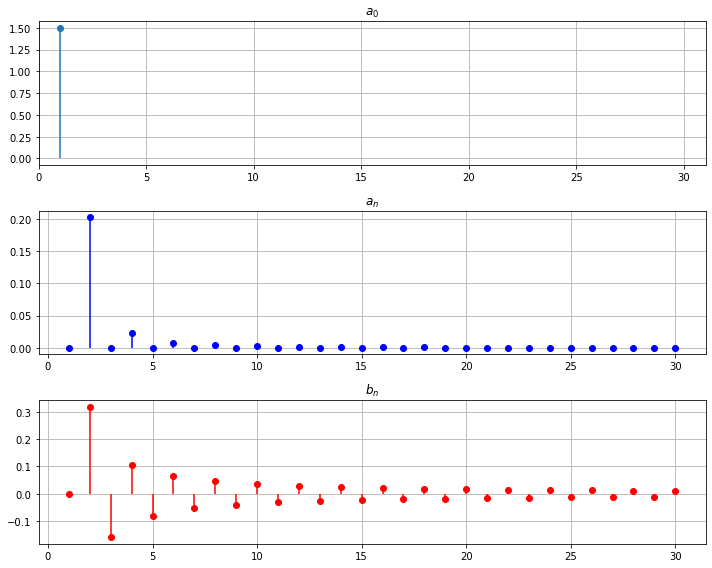

In [5]:
plt.figure(figsize=(10, 8))

# Az a_0 ábrázolása
subplot(311)
stem([1], [a_0])
xlim(0,31)
grid()
title(r'$a_0$')

# Az a_n ábrázolása
plt.subplot(312)
n_values = np.arange(1, len(a_n) + 1)
grid()
stem(n_values, a_n, basefmt=' ', markerfmt='bo', linefmt='-b')
title(r'$a_n$')

# A b_n ábrázolása
subplot(313)
grid()
stem(n_values, b_n, basefmt=' ', markerfmt='ro', linefmt='-r')
title(r'$b_n$')

tight_layout()
show()








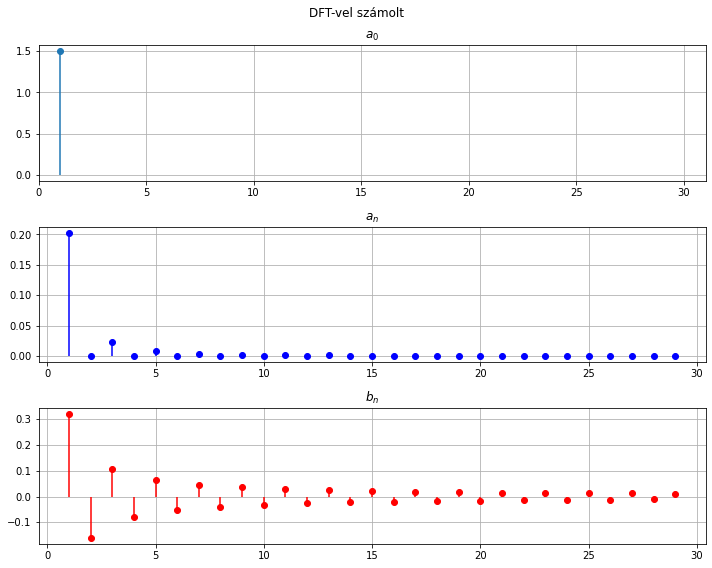

In [6]:
plt.figure(figsize=(10, 8))

plt.suptitle("DFT-vel számolt")
# Az a_0 ábrázolása
plt.subplot(311)
plt.stem([1], [a_02])
xlim(0,31)
grid()
plt.title(r'$a_0$')

# Az a_n ábrázolása
plt.subplot(312)
n_values = np.arange(1, len(a_n2) + 1)
grid()
plt.stem(n_values, a_n2, basefmt=' ', markerfmt='bo', linefmt='-b')
plt.title(r'$a_n$')

# A b_n ábrázolása
plt.subplot(313)
grid()
plt.stem(n_values, b_n2, basefmt=' ', markerfmt='ro', linefmt='-r')
plt.title(r'$b_n$')

plt.tight_layout()
plt.show()

In [7]:
def reconstructed_signal(t, a_0, a_n, b_n, num_terms):
    result = a_0 / 2 + np.zeros_like(t)  
    for n in range(1, num_terms): #itt határozom meg, hogy hány tagot használok az ábrázloláshoz
        result += a_n[n] * np.cos(2 * np.pi * n * t / T) + b_n[n] * np.sin(2 * np.pi * n * t / T)
    return result

A jel rekonstruálása a fentebb ismertetett képlet alapján történt.

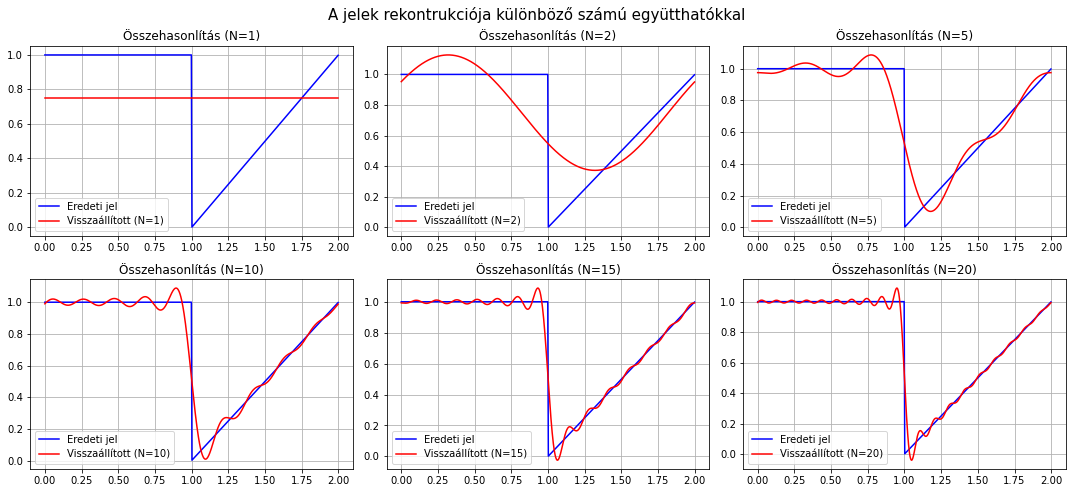

In [8]:
num_terms_to_compare = [1, 2, 5, 10,15,20]

plt.figure(figsize=(15, 10))

for i, num_terms in enumerate(num_terms_to_compare):
    reconstructed = reconstructed_signal(time, a_0, a_n, b_n, num_terms)

    plt.suptitle("A jelek rekontrukciója különböző számú együtthatókkal",size = 15)
    plt.subplot(3, 3, i + 1)
    plot(time, signal1, label='Eredeti jel', color='blue')
    plot(time, reconstructed, label=f'Visszaállított (N={num_terms})', color='red')
    title(f'Összehasonlítás (N={num_terms})')
    grid()
    legend()

plt.tight_layout()
plt.show()

### Különbségek:

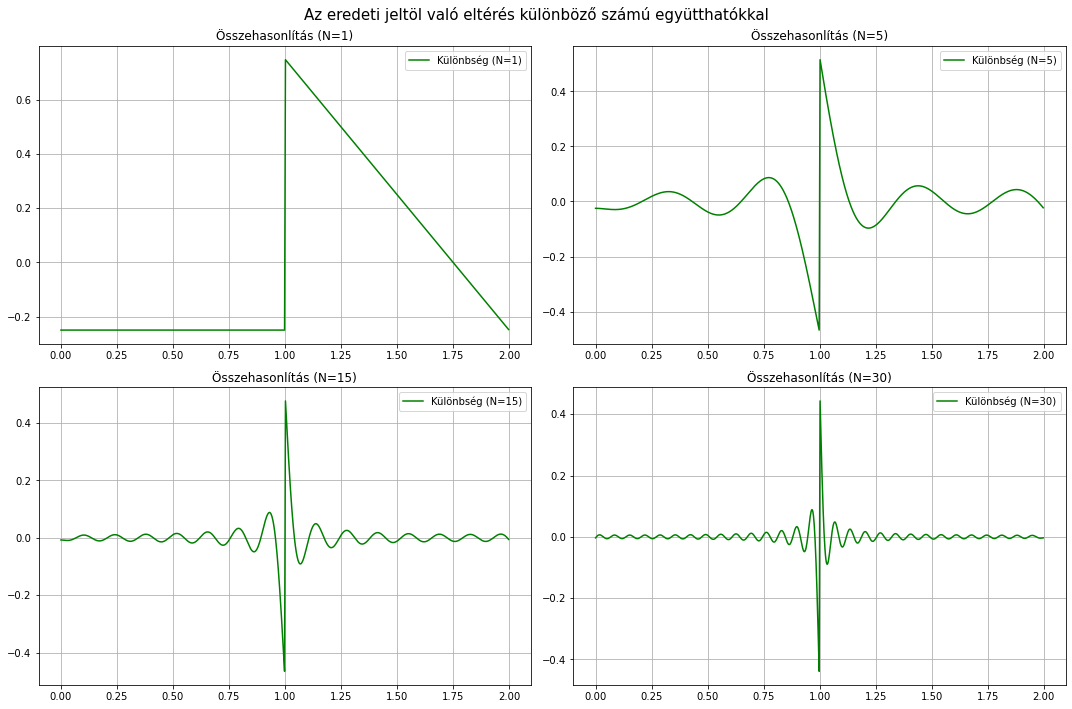

In [9]:
num_terms_to_compare = [1,5,15,30]

plt.figure(figsize=(15, 10))

for i, num_terms in enumerate(num_terms_to_compare):
    reconstructed = reconstructed_signal(time, a_0, a_n, b_n, num_terms)
    diff = reconstructed - signal1

    plt.suptitle("Az eredeti jeltöl való eltérés különböző számú együtthatókkal",size = 15)
    plt.subplot(2, 2, i + 1)
    plt.plot(time, diff, label=f'Különbség (N={num_terms})', color='g')
    plt.title(f'Összehasonlítás (N={num_terms})')
    grid()
    plt.legend()

plt.tight_layout()
plt.show()

## 2. feladat
Lásd be a _Plancherel-tételt_, azaz ha $f$ és $g$ $L^2$-integrálható függvények, melyek Fourier-transzformáltjai $F$ és $G$, akkor teljesül, hogy
$$\langle f,g \rangle = \langle F,G \rangle.$$

Numerikusan is vizsgáld meg, mennyire teljesül diszkrét esetben ez az összefüggés.

In [10]:
#válasszunk két jelet:

def f_func(x):
    return x

def g_func(x):
    return 1/x

x = arange(1,20)

f = array(f_func(x))
F = np.fft.fft(f)
g = array(g_func(x))
G = np.fft.fft(g)

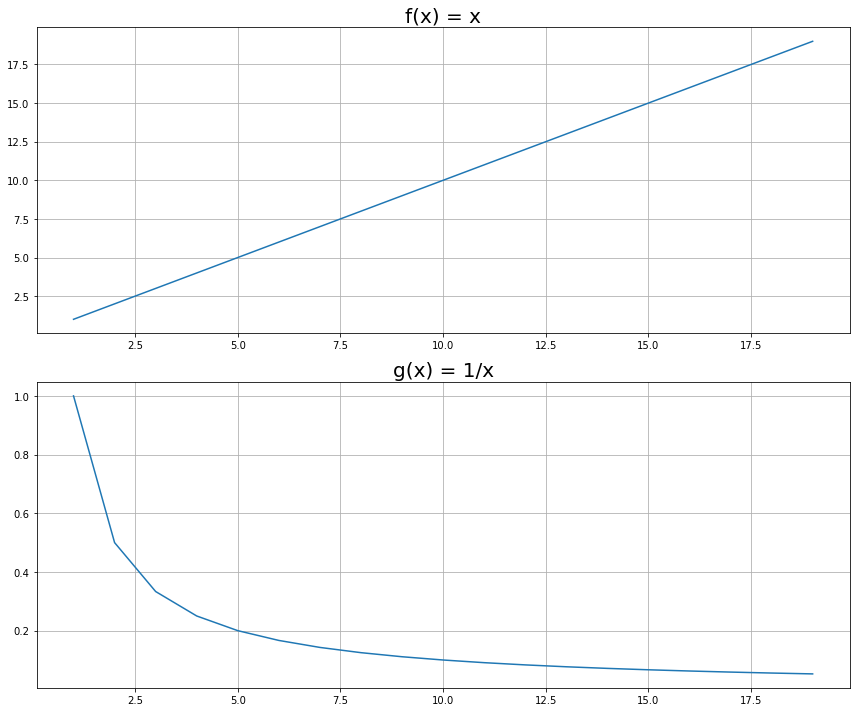

In [11]:
plt.subplot(211)
plt.plot(x,f)
grid()
title(r"f(x) = x", size = 20)


plt.subplot(212)
plt.plot(x,g)
grid()
title(r"g(x) = 1/x", size = 20)

plt.tight_layout()

In [12]:
fg = f*g
FG = F*G

diff = np.abs(fg-FG)

Text(0.5, 1.0, '$\\langle f,g\\rangle$ és $\\langle F,G \\rangle$ abszolút külöbsége')

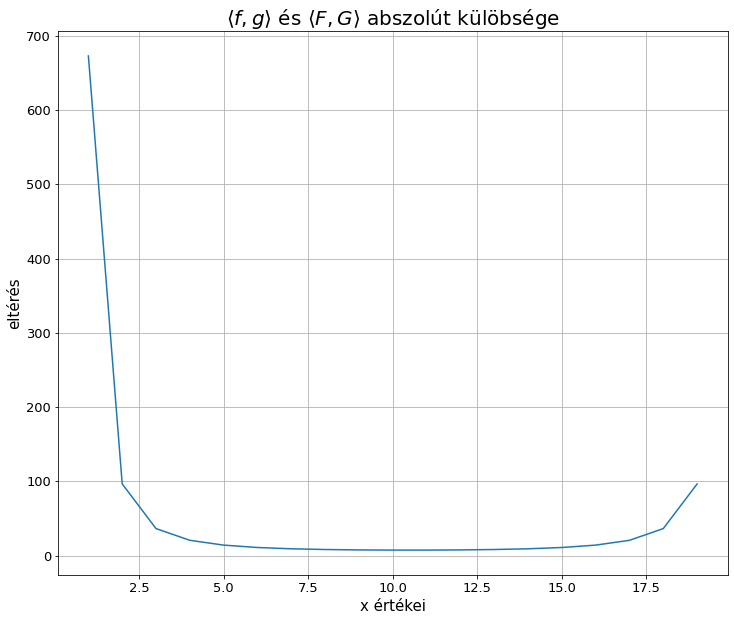

In [13]:
plot(x,diff)
xlabel("x értékei", size = 15)
xticks(size=13)
yticks(size=13)
ylabel("eltérés", size = 15)
grid()
title(r"$\langle f,g\rangle$ és $\langle F,G \rangle$ abszolút külöbsége", size = 20)

Mint az ábrán is láthatjuk koránt sem mindig teljesül a tétel, viszont egy elég hosszú szakaszon közel nulla volt az eltérés a diszkrét értékek skalárszorzatai között.

## 3. feladat

Legyen $s[n]$ próbajel $\alpha$ kitöltési tényezőjű $T$ periódusidejű négyszögjel. Ábrázold a Fourier-együtthatókat, és vizsgáld meg, mennyire térnek el az analitikusan várt értékektől.

Ezután tégy két kísérletet az együtthatókkal:

1. keverd össze az együtthatók valós részét,
2. keverd össze az eredeti együtthatók képzetes részét,
3. keverd össze az együtthatók nagyságait,
4. keverd össze az együtthatók fázisait.

A fenti kísérletek új együtthatóiból inverz gyors Fourier-transzformációval állítsd elő $s_1[n] \dots s_4[n]$ jeleket. Mit tapasztalsz? Hogyan kell a kísérletekben keverni az együtthatókat ahhoz, hogy $s_i$ valós legyen?

In [14]:
T = 2.0  # Periódusidő
alpha = 0.8  # Kitöltési tényező
num_samples = 1000  # Mintavételezési pontok száma
n = np.arange(num_samples)  # Mintavételezési időpontok
time = linspace(0,T,num_samples)

# A periódusidejű négyszögjel definiálása
def signal2(T,alpha,num_samples,n):
    if alpha > 0 and alpha < 1:
        s = np.where((n * T / num_samples) % T < T * alpha, 1, -1)
        s[0] = -1 # csak a szebb ábrázolás érdekében
        s[-1] = -1
    else: 
        s = np.where((n * T / num_samples) % T < T * alpha, 1, -1)
        
    return s

In [15]:
s = signal2(T,0.8,num_samples,n)

Text(0.5, 1.0, 'Egy T = 2 periódusidejű és $\\alpha = 0.8$ kitöltési tényezőjű négyszögjel')

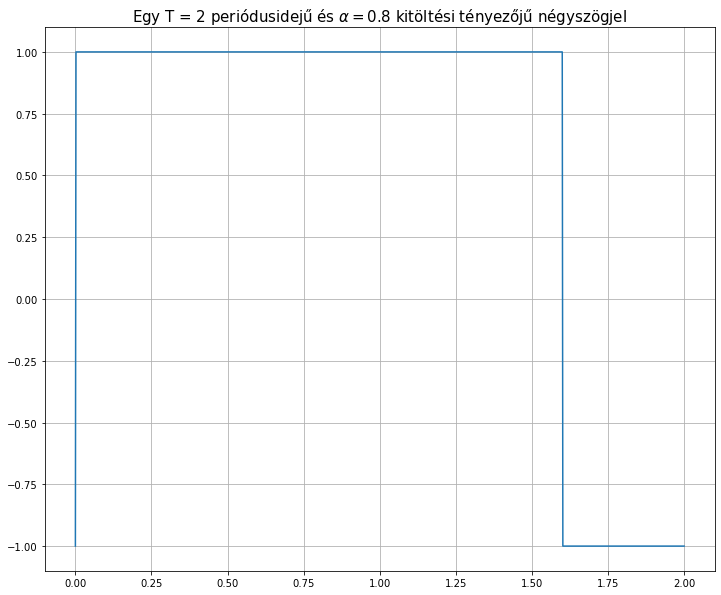

In [16]:
plot(time,s)
grid()
title(r"Egy T = 2 periódusidejű és $\alpha = 0.8$ kitöltési tényezőjű négyszögjel", size = 15)

In [17]:
a_0, a_n, b_n = coefficients(2, s,30)  # Fourier együtthatók számolása
a_02,a_n2,b_n2 = coefficients2(time,s,30)

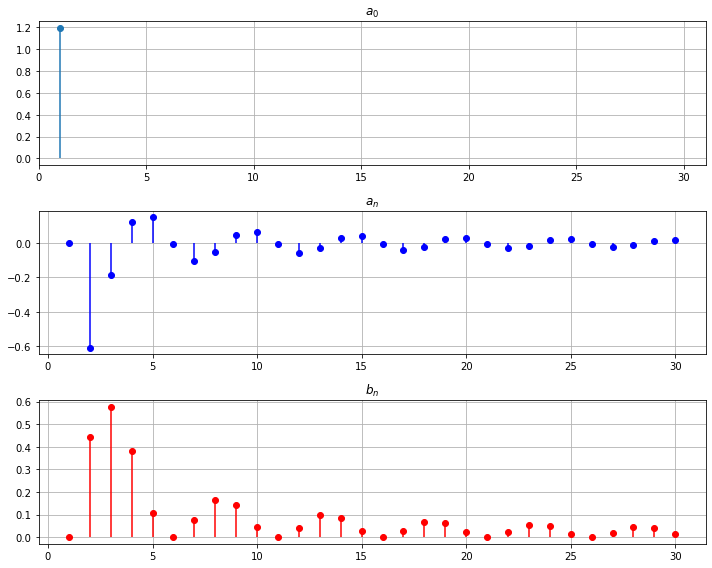

In [18]:
plt.figure(figsize=(10, 8))

# Az a_0 ábrázolása
plt.subplot(311)
plt.stem([1], [a_0])
xlim(0,31)
grid()
plt.title(r'$a_0$')

# Az a_n ábrázolása
plt.subplot(312)
n_values = np.arange(1, len(a_n) + 1)
grid()
plt.stem(n_values, a_n, basefmt=' ', markerfmt='bo', linefmt='-b')
plt.title(r'$a_n$')

# A b_n ábrázolása
plt.subplot(313)
grid()
plt.stem(n_values, b_n, basefmt=' ', markerfmt='ro', linefmt='-r')
plt.title(r'$b_n$')

plt.tight_layout()
plt.show()

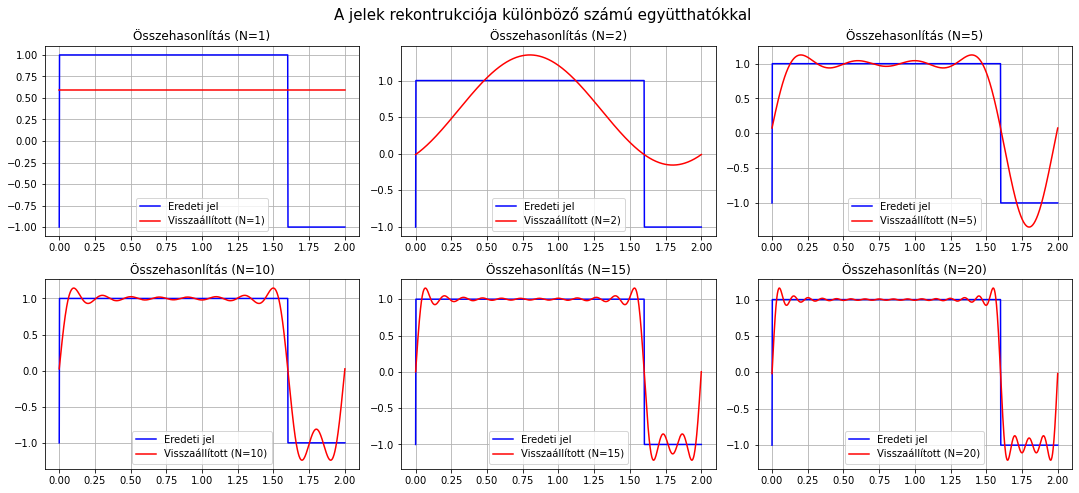

In [19]:
num_terms_to_compare = [1, 2, 5, 10,15,20]

plt.figure(figsize=(15, 10))

for i, num_terms in enumerate(num_terms_to_compare):
    reconstructed = reconstructed_signal(time, a_0, a_n, b_n, num_terms)

    plt.suptitle("A jelek rekontrukciója különböző számú együtthatókkal",size = 15)
    plt.subplot(3, 3, i + 1)
    plt.plot(time, s, label='Eredeti jel', color='blue')
    plt.plot(time, reconstructed, label=f'Visszaállított (N={num_terms})', color='red')
    plt.title(f'Összehasonlítás (N={num_terms})')
    grid()
    plt.legend()

plt.tight_layout()
plt.show()

Teszteltem, hogy a kiszámított együtthatók valóban rekonstruálják az eredeti jelet.

### analitikus számolgatások

$a_0 = \frac{1}{T}\int_0^T f(t) dt = \frac{1}{2}\int_0^2 f(t) dt = 1$

Az $a_n$ Fourier együttható analitikus kiszámítása:


\begin{equation}
a_n = \frac{2}{T} \int_{0}^{T} f(t) \cos\left(\frac{2\pi n t}{T}\right) \, dt
\end{equation}

két részre bontottam:

\begin{equation}
a_n = \frac{2}{T} \left(\int_{0}^{T\alpha} f(t) \cos\left(\frac{2\pi n t}{T}\right) \, dt + \int_{T\alpha}^{T} f(t) \cos\left(\frac{2\pi n t}{T}\right) \, dt\right)
\end{equation}

Az első integrál kiszámítása:

\begin{equation}
\int_{0}^{T\alpha} f(t) \cos\left(\frac{2\pi n t}{T}\right) \, dt = \frac{T\alpha}{\pi n} \sin(2\pi n \alpha)
\end{equation}

A második integrál számítása hasonló, csak most a határok $T\alpha$ és $T$ között vannak:

\begin{equation}
\int_{T\alpha}^{T} f(t) \cos\left(\frac{2\pi n t}{T}\right) \, dt = \frac{(T-T\alpha)}{\pi n} \sin(2\pi n (1-\alpha))
\end{equation}

Most az együtthatók összegezhetők:

\begin{equation}
a_n = \frac{2}{T} \left(\frac{T\alpha}{\pi n} \sin(2\pi n \alpha) + \frac{(T-T\alpha)}{\pi n} \sin(2\pi n (1-\alpha))\right)
\end{equation}

Ez egyszerűsíthető:

\begin{equation}
a_n = \frac{1}{\pi n} \left(\alpha \sin(2\pi n \alpha) + (1-\alpha) \sin(2\pi n (1-\alpha))\right)
\end{equation}


A $b_n$ Fourrier együttható analitkus kiszámolása

\begin{equation}
b_n = \frac{2}{T} \int_{0}^{T} f(t) \sin\left(\frac{2\pi n t}{T}\right) \, dt
\end{equation}

Az integrálás során az integrált területet két részre bontjuk:

\begin{equation}
b_n = \frac{2}{T} \left(\int_{0}^{T\alpha} f(t) \sin\left(\frac{2\pi n t}{T}\right) \, dt + \int_{T\alpha}^{T} f(t) \sin\left(\frac{2\pi n t}{T}\right) \, dt\right)
\end{equation}

Az első integrál kiszámítása:

\begin{equation}
\int_{0}^{T\alpha} f(t) \sin\left(\frac{2\pi n t}{T}\right) \, dt = \frac{T\alpha}{\pi n} \left(1 - \cos(2\pi n \alpha)\right)
\end{equation}

A második integrál számítása hasonló, csak most a határok $T\alpha$ és $T$ között vannak:

\begin{equation}
\int_{T\alpha}^{T} f(t) \sin\left(\frac{2\pi n t}{T}\right) \, dt = \frac{(T - T\alpha)}{\pi n} \left(\cos(2\pi n \alpha) - 1\right)
\end{equation}

Most az együtthatók összegezhetők:

\begin{equation}
b_n = \frac{2}{T} \left(\frac{T\alpha}{\pi n} \left(1 - \cos(2\pi n \alpha)\right) + \frac{(T - T\alpha)}{\pi n} \left(\cos(2\pi n \alpha) - 1\right)\right)
\end{equation}

Ez egyszerűsíthető:

\begin{equation}
b_n = \frac{2}{T} \left(\frac{2T\alpha}{\pi n} \left(1 - \cos(2\pi n \alpha)\right) - \frac{2(T - T\alpha)}{\pi n}\right)
\end{equation}

Végül:

\begin{equation}
b_n = \frac{2}{\pi n} \left(\frac{2\alpha}{T} \left(1 - \cos(2\pi n \alpha)\right) - \frac{2(T - T\alpha)}{T\pi n}\right)
\end{equation}

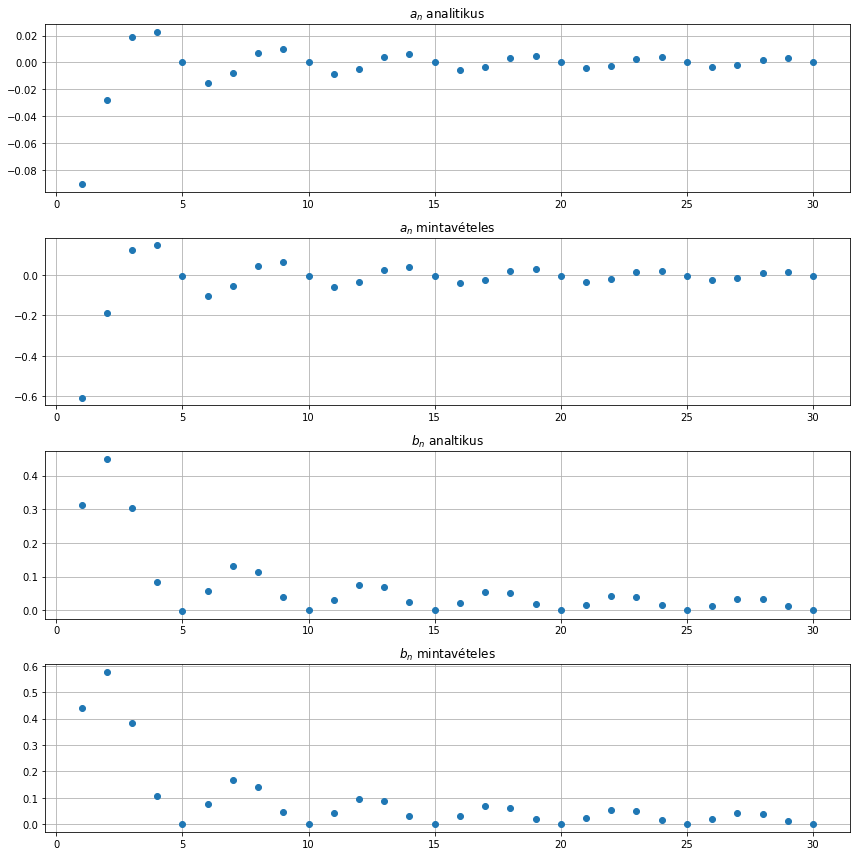

In [20]:
a_0, a_n_sampled, b_n_sampled = coefficients2(time, s,31) #itt a DFT-s verzióval szebb eredményt kaptam

a_n_analytic = []
b_n_analytic = []

num_samples = 31
n_values = np.arange(1, 31)

for n in n_values:
    a_n = (1 / (np.pi * n)) * (alpha * np.sin(2 * np.pi * n * alpha) + (1 - alpha) * np.sin(2 * np.pi * n * (1 - alpha))) #itt valószínűleg eljőjelet tévedtem valahol mert így jött ki jól
    b_n = (2 / (np.pi * n)) * (2 * alpha * (1 - np.cos(2 * np.pi * n * alpha)) - (2 * (T - T * alpha)) / (T * np.pi * n))
    
    a_n_analytic.append(a_n)
    b_n_analytic.append(b_n)

a_n_analytic = array(a_n_analytic)/2
b_n_analytic = array(b_n_analytic)/2

plt.figure(figsize=(12, 12))

# Az analitikus a_n
plt.subplot(411)
plt.plot(n_values, a_n_analytic[:30], marker='o', ls=" ")


plt.title(r'$a_n$ analitikus')
grid()

# A mintavételezéses a_n
plt.subplot(412)
plt.plot(n_values, a_n_sampled, marker='o', ls=" ")
plt.title(r'$a_n$ mintavételes')
grid()

# Az analitikus b_n
plt.subplot(413)
plt.plot(n_values, b_n_analytic[:30], marker="o", ls=" ")
plt.title(r'$b_n$ analtikus')
grid()

# A mintavételezéses b_n
plt.subplot(414)
plt.plot(n_values, b_n_sampled, marker="o", ls=" ")
plt.title(r'$b_n$ mintavételes')
grid()

plt.tight_layout()

plt.show()



In [21]:
a_n_difference = np.abs(np.array(a_n_analytic[:30]) - np.array(a_n_sampled)) 
b_n_difference = np.abs(np.array(b_n_analytic[:30]) - np.array(b_n_sampled)) 

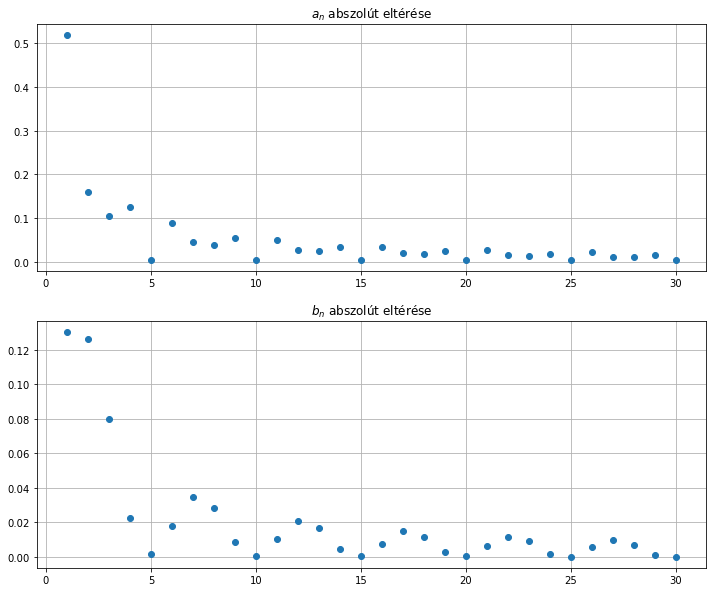

In [22]:
plt.subplot(211)
plt.plot(n_values,a_n_difference, marker='o', ls=" ")
plt.title(r'$a_n$ abszolút eltérése')
grid()

plt.subplot(212)
plt.plot(n_values, b_n_difference, marker='o', ls=" ")
plt.title(r'$b_n$ abszolút eltérése')
grid()

### cseréljük meg a valós részét:

In [23]:
s2 = signal2(2,0.5,1000,np.arange(1000))
time2 = linspace(0,2,1000)

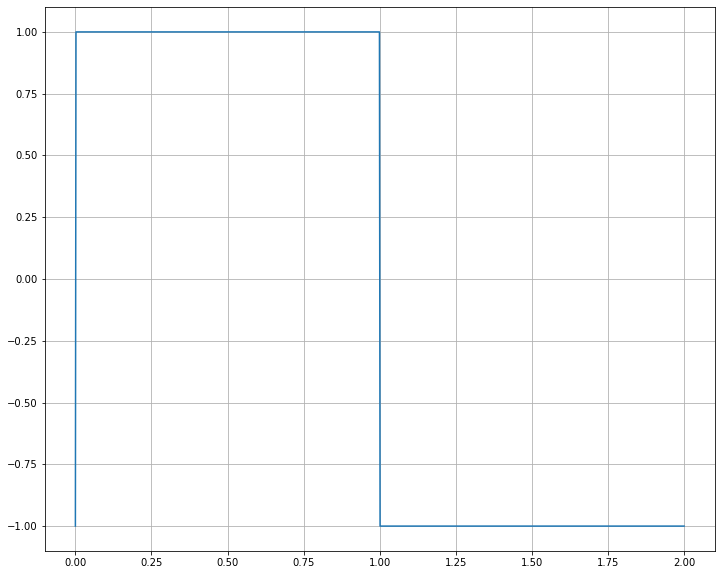

In [24]:
plot(time2,s2)
grid()

In [25]:
#első kísérlet - DFT-s képlet alapján próbáltam

def modified_one(t, function, num_coefficients):
    fourrier = np.fft.rfft(function) / t.size
    fourrier *= 2
    a_0 = fourrier[0].real
    a_n = fourrier[1:num_coefficients].real
    b_n = -fourrier[1:num_coefficients].imag  

    
    
    a_n = b_n.real    
    return a_0, a_n, b_n



In [26]:
first_a0, first_an, first_bn = modified_one(time2, s2, 1000)

In [27]:
reconstr = reconstructed_signal(time2,first_a0,first_an,first_bn,500)

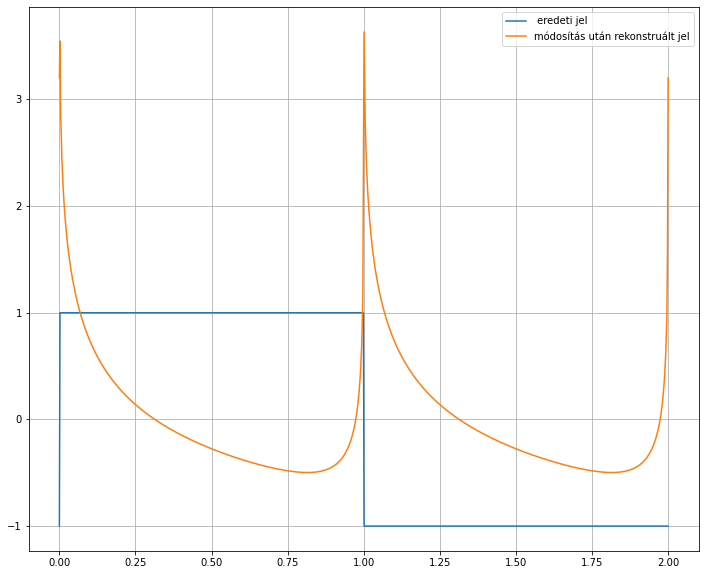

In [28]:
plot(time2,s2, label = " eredeti jel")
plot(time2,reconstr, label = "módosítás után rekonstruált jel")
legend()
grid()

### második módosítás

In [29]:
def modified_two(t, function, num_coefficients):
    fourrier = np.fft.rfft(function) / t.size
    fourrier *= 2
    a_0 = fourrier[0].real
    a_n = fourrier[1:num_coefficients].real
    b_n = -fourrier[1:num_coefficients].imag

    
    
    
    b_n = a_n.imag

    return a_0, a_n, b_n


In [30]:
second_a0, second_an, second_bn = modified_two(time2, s2, 1000)
reconstr2 = reconstructed_signal(time2,second_a0,second_an,second_bn,500)

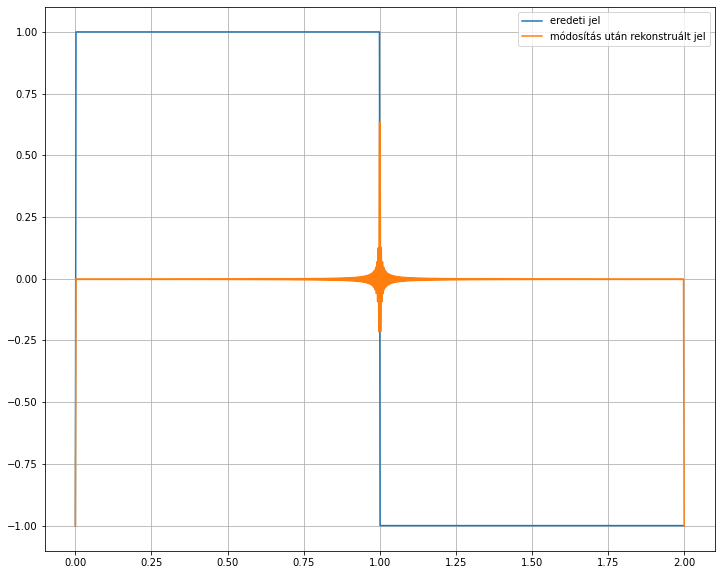

In [31]:
plot(time2,s2, label = "eredeti jel")
plot(time2,reconstr2, label = "módosítás után rekonstruált jel")
legend()
grid()


$\textbf{Mintha az átlagot emelné ki}$

## 4. feladat

Implementálj saját spektrogram készítő függvényt. A függvény legyen képes kezelni különböző ablakméretet. Készíts hozzá ábrázoló eljárást is ügyelve az ábra skáláira. Alkalmazd az áljárásod egy tetszőleges adatsorra, például hangminta, és elemezd az ábrá(i)d. 

Nézz utána annak is, milyen könyvtári függvény valósítja meg ezt a feladatot, és készítsd el azzal is az elemzést.

Próbáld meg elkészíteni azt az eljárást, ami egy _spektrogramból_ állítja elő az eredeti jelet. Mennyire sikerül rekonstruálni az eredeti jelet? Próbálj módosításokat is elvégezni a spektrogramon a jel visszaállítása előtt. Mik a tapasztalataid?

In [32]:
#generálunk egy mesterséges jelet

def signal_generator(frekvencia,mintavétel,jelhossz):
    #szinusz hullámokat fogok szimulálni - 1mp
    ts1sec = list(np.linspace(0,np.pi*2*frekvencia,mintavétel))
    #létrehozom az adott hosszúságú jelet 
    ts = ts1sec*jelhossz
    return(list(np.sin(ts)))

mintavétel  = 4000
jelhossz = 3

#két ilyet összefűzök
ts1  = np.array(signal_generator(600, mintavétel,jelhossz)) 
ts1 += np.array(signal_generator(1200,mintavétel,jelhossz))
ts1  = list(ts1)

#közé  1s néma szakaszt helyeztem, hogy jobban el lehessen különíteni
ts_nema = [0]*mintavétel*1 


ts2  = np.array(signal_generator(600, mintavétel,jelhossz)) 
ts2 += np.array(signal_generator(700,mintavétel,jelhossz))
ts2  = list(ts2)


ts = ts1 + ts_nema + ts2

Text(0.5, 1.0, 'hangadat')

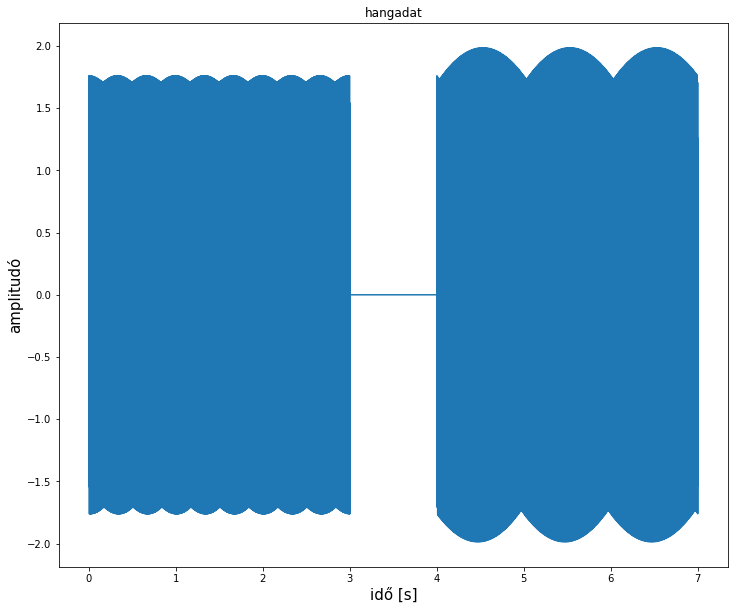

In [33]:
#Előszőr is ábrázolom a hangfilet
sound_time = np.linspace(0,len(ts)/mintavétel,len(ts))
plot(sound_time,ts)
xlabel("idő [s]",size = 15)
ylabel("amplitudó", size = 15)
title("hangadat")

The discrete analog of the formula for the coefficients of a Fourier series:
\begin{equation}
x_n = \frac{1}{N}\underset{k = 0}{\overset{N_1}{\sum}}X_K \cdot e^{\frac{i2\pi kn}{N}}
\end{equation}


forrás: https://en.wikipedia.org/wiki/Discrete_Fourier_transform

Nyquist frequency (cycles per second) is the frequency whose cycle-length (or period) is twice the interval between samples. Thus the frequency limit is sample rate / 2

In [34]:
def xn(Xk,n): #egy adott értékre számolja ki
    N  = len(Xk)
    k = np.arange(0,N,1)
    xn = np.sum(Xk*np.exp((1j*2*np.pi*k*n)/N))/N
    return(xn)

def xns(ts):
    magnitude = []
    N = len(ts)
    for n in range(int(N/2)): #Nyquist limit
        magnitude.append(np.abs(xn(ts,n))*2) #szimmetria miatt
    return(magnitude)
magnitude = xns(ts)

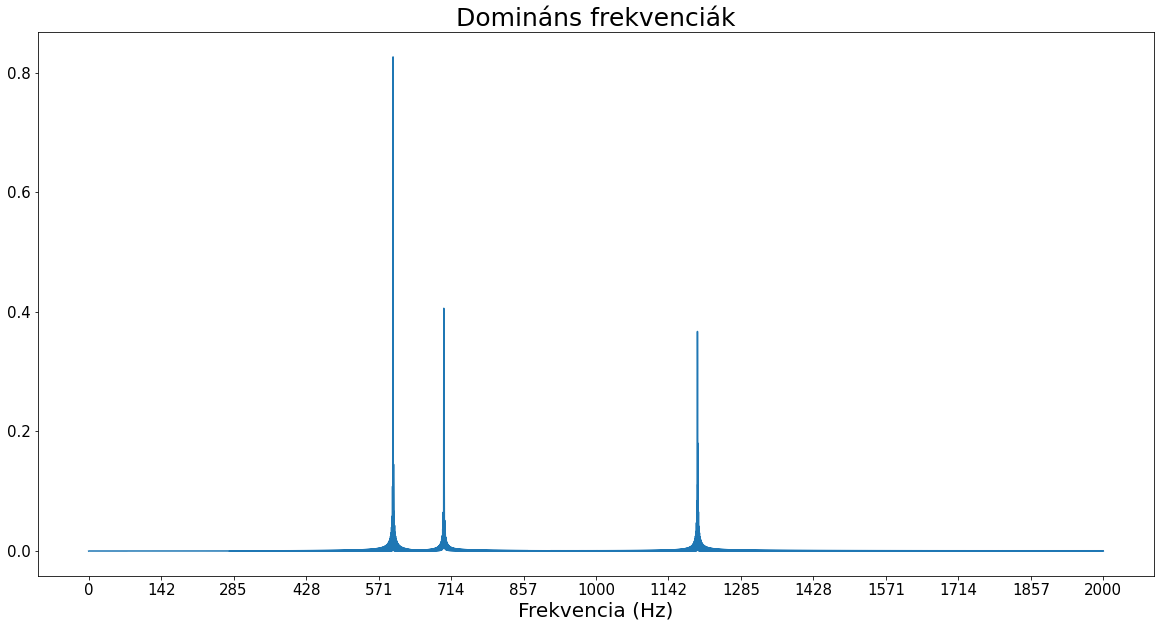

In [35]:
def Hz(ks,mintavétel,Npoints): #visszaváltjuk Hz-re
    freq_Hz = ks*mintavétel/Npoints
    freq_Hz  = [int(i) for i in freq_Hz ]
    return(freq_Hz )

ks   = np.linspace(0,len(magnitude),15) 
ksHz = Hz(ks,mintavétel,len(ts))

plt.figure(figsize=(20,10))
plt.plot(magnitude)
plt.xticks(ks,ksHz, size = 15)
plt.yticks(size= 15)
plt.title("Domináns frekvenciák", size = 25)
plt.xlabel("Frekvencia (Hz)", size = 20)
plt.show()

We perform DFT on subwindow of the original time series and slide down the subwindow across the signal, to obtain the time-dependent Fourier coefficients. This is essentially the short term DFT (SDFT).

In [36]:
def spectrogram(ts,blokk_hossza,atfedes = None): #megnézni holnap
    if atfedes is None:
        atfedes = blokk_hossza/2 #megadunk egy alapértelmezett hosszt az átfedésnek
    atfedes = int(atfedes)
    starts  = np.arange(0,len(ts),blokk_hossza-atfedes,dtype=int) #meghatározzuk az ablak helyének kezdeti értékét
    starts  = starts[starts + blokk_hossza < len(ts)] 
    xns_vals = []
    for start in starts:
        # short term discrete fourier transform
        ts_ablak = xns(ts[start:start + blokk_hossza]) 
        xns_vals.append(ts_ablak)
    specX = np.array(xns_vals).T
    


    return(starts,specX)

blokk_hossza = 250
starts, spec = spectrogram(ts,blokk_hossza,atfedes = 100 )

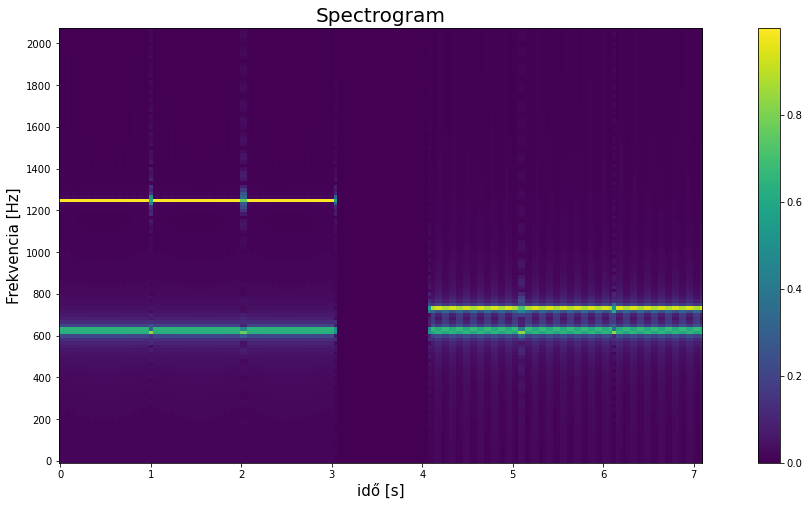

In [37]:
def plot_spectrogram(spec,ks,sample_rate, L, starts, mappable = None):
    plt.figure(figsize=(20,8))
    plt_spec = plt.imshow(spec,origin='lower')



    plt.yticks([i for i in range(0,spec.shape[0],int(spec.shape[0]/10))],[f"{i}" for i in range(0,2001,200)], size = 10)
    plt.ylabel("Frekvencia [Hz]", size = 15)


    plt.xticks([i for i in range(0,spec.shape[1],int(spec.shape[1]/7))], [f"{i}" for i in range(8)], size = 10)
    plt.xlabel("idő [s]", size = 15)

    plt.title("Spectrogram", size = 20)
    plt.colorbar(mappable,use_gridspec=True)
    plt.show()
    return(plt_spec)
plot_spectrogram(spec,ks,mintavétel,blokk_hossza, starts)

A spektrogramm implementálását sikeresnek mondhatom, tisztán kirajzolódnak a jelben szereplő frekvenciák, valamint a színkóddal még azt is meg tudom mondani, melyik a legdominánsabb.

#### Összehasonlítás a könyvtári spektrogrammal

/opt/conda/lib/python3.8/site-packages/matplotlib/axes/_axes.py:7553: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


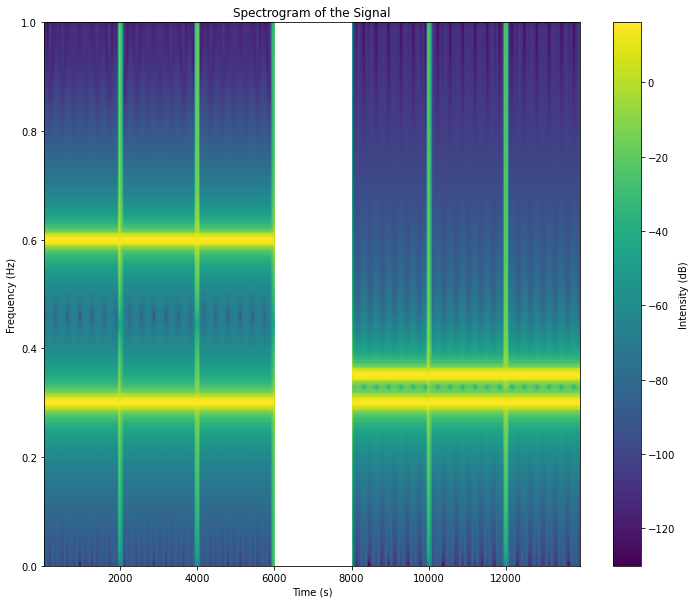

In [38]:
plt.figure()
plt.specgram(ts, cmap='viridis') 
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram of the Signal')
plt.colorbar(label='Intensity (dB)')

Szerintem egész jól sikerült reprodukálni a spektrogramm készítést, mert szinte ugyan azt az eredményt kaptam. Egyik szembetűnő különbség, hogy a könyvtári függvény még decibelre váltja, ami egy 10-es alapú logaritmikus skálázást jelent.

## 5. feladat

Alakítsd át úgy az előző feladat eljárását, hogy frekvenciában ne lineárisan legyenek a osztóközök. Ismerkedj meg a mel skálával, és vesd egybe tapasztalataid az előző feldatatból megismertekkel. 

## 6. feladat

Generálj két, egymáshoz közeli frekvenciájú színuszos jelet, amihez keverj zajt, pl. $f_1=1000$ és $f_2=1000.1$ Hz jelek 100-as amplitudóval, és Gauss eloszlású zaj 1 amplitudóval.

Mintavételezd a keveréket kb. 10000 ciklusnyi időtartamban $N$ véletlenszerű pontban. 

Készítsd el a periodogrammot!

Hogyan változik a felbontóképesség $N$ szerint? Mikor látszik a két különböző frekvenciájú színusz szétválni?


In [39]:
fs = 1000 # mintavételezés
T = 1.0
t = np.linspace(0, T, int(T * fs), endpoint=False)


f1 = 1000.0  # Hz
signal1 = 100 * np.sin(2 * np.pi * f1 * t)


f2 = 999.99  # Hz
signal2 = 100 * np.sin(2 * np.pi * f2 * t)

# Zaj 
noise = np.random.normal(0, 1, len(t))

# A zaj hozzákeverése a jelekhez
signal1_with_noise = signal1 + noise
signal2_with_noise = signal2 + noise




#mintavételezés

N = 1000
sample_points = np.random.choice(t, N, replace=False)
sampled_signal1 = signal1_with_noise[np.round(sample_points * fs).astype(int)]
sampled_signal2 = signal2_with_noise[np.round(sample_points * fs).astype(int)]

Text(0, 0.5, 'Teljesítménysűrűség')

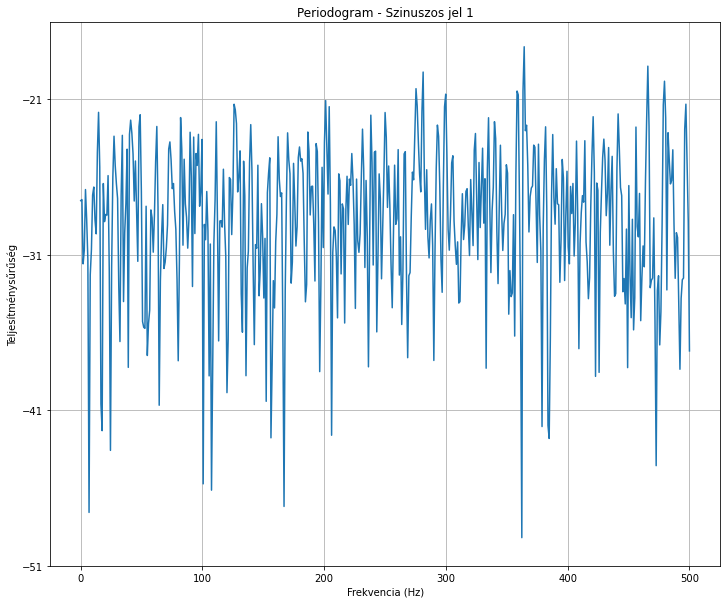

In [40]:
frequencies, periodogram = plt.psd(sampled_signal1, NFFT=1024, Fs=fs, scale_by_freq=True)
plt.title('Periodogram - Szinuszos jel 1')
plt.xlabel('Frekvencia (Hz)')
plt.ylabel('Teljesítménysűrűség')

Text(0, 0.5, 'Teljesítménysűrűség')

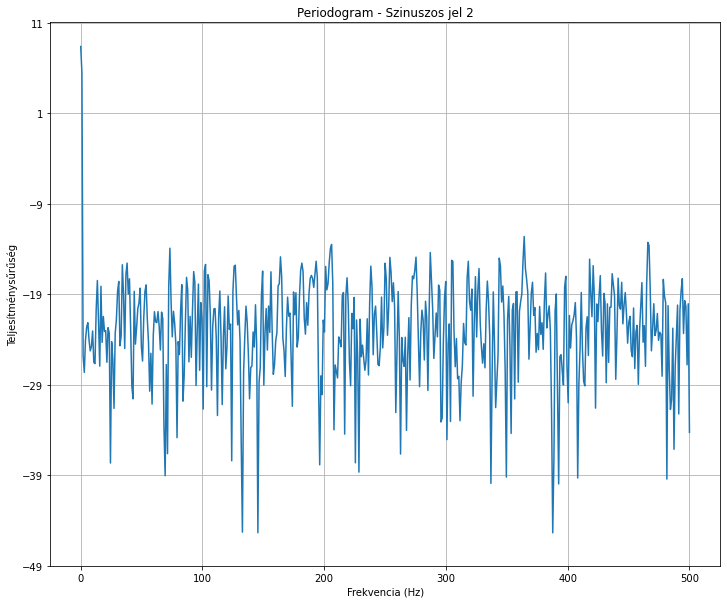

In [41]:
frequencies, periodogram = plt.psd(sampled_signal2, NFFT=1024, Fs=fs, scale_by_freq=True)
plt.title('Periodogram - Szinuszos jel 2')
plt.xlabel('Frekvencia (Hz)')
plt.ylabel('Teljesítménysűrűség')

Most N értékét változtatgatva vizsgáljuk a felbontóképességet, valamint megpróbáljuk megkeresni mikor kezd látszani a két külöböző frekvenciájú szinusz jel szétválása.

In [42]:
signal1long = []
signal2long = []
cycles = 10000
current_cycle = 0
while current_cycle < cycles:
    
    fs = 100 # mintavételezés
    T = 1.0
    t = np.linspace(0, T, int(T * fs), endpoint=False)
    f1 = 1000.0  # Hz
    signal1 = 100 * np.sin(2 * np.pi * f1 * t)
    noise = np.random.normal(0, 1, len(t))
    signal1_with_noise = signal1 + noise
    signal1long.append(signal1_with_noise)
    
    f2 = 999.99  # Hz
    signal2 = 100 * np.sin(2 * np.pi * f2 * t)
    noise = np.random.normal(0, 1, len(t))
    signal2_with_noise = signal2 + noise
    signal2long.append(signal2_with_noise)

    current_cycle += 1
    

    